In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [2]:
import numpy as np
import pandas as pd

In [3]:
#Read file
seed = 7
np.random.seed(seed)
data =pd.read_csv ("gas_turbines.csv")
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
titles=list(data.columns)
titles

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

In [5]:
titles[7],titles[10]=titles[10],titles[7]

In [6]:
titles

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'NOX', 'CDP', 'CO', 'TEY']

In [7]:
data=data[titles]

In [8]:
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,NOX,CDP,CO,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,82.722,10.605,3.1547,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,82.776,10.598,3.2363,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,82.468,10.601,3.2012,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,82.670,10.606,3.1923,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,82.311,10.612,3.2484,114.72
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,79.559,10.400,4.5186,111.61
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,79.917,10.433,4.8470,111.78
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,90.912,10.483,7.9632,110.19
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,93.227,10.533,6.2494,110.74


In [24]:
data.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,NOX,CDP,CO,TEY
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.600006,-0.100705,-0.088588,-0.207495
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.256744,0.131198,0.041614,0.146939
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,0.143061,-0.182010,0.165505,-0.110272
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,-0.037299,0.727152,-0.334207,0.717995
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,-0.208496,0.993784,-0.508259,0.977042
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,-0.231636,0.887238,-0.688272,0.891587
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,0.009888,-0.744740,0.063404,-0.720356
NOX,-0.600006,0.256744,0.143061,-0.037299,-0.208496,-0.231636,0.009888,1.000000,-0.169103,0.316743,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,-0.169103,1.000000,-0.520783,0.988473
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,0.316743,-0.520783,1.000000,-0.541751


In [9]:
#Standardization of data
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [10]:
scaler=preprocessing.StandardScaler()
data1=scaler.fit_transform(data)
data2=pd.DataFrame(data1)
data2

,0,1,2,3,4,5,6,7,8,9,10
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,1.387845,-1.357331,0.532012,-1.231172
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,1.393002,-1.363676,0.568733,-1.229909
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,1.363586,-1.360957,0.552938,-1.230541
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,1.382878,-1.356424,0.548933,-1.229909
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,1.348591,-1.350985,0.574179,-1.229909
...,...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,1.085751,-1.543161,1.145792,-1.426381
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,1.119943,-1.513247,1.293578,-1.415642
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,2.170062,-1.467922,2.695925,-1.516089
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,2.391165,-1.422598,1.924683,-1.481343


In [15]:
x=data2.iloc[0:9]

In [16]:
x

,0,1,2,3,4,5,6,7,8,9,10
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,1.387845,-1.357331,0.532012,-1.231172
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,1.393002,-1.363676,0.568733,-1.229909
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,1.363586,-1.360957,0.552938,-1.230541
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,1.382878,-1.356424,0.548933,-1.229909
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,1.348591,-1.350985,0.574179,-1.229909
5,-1.328821,-0.389864,0.984836,-0.890186,-1.374309,-1.452072,0.581427,1.357951,-1.338295,0.663417,-1.229909
6,-1.316898,-0.249470,0.932273,-0.882030,-1.380060,-1.439971,0.568715,1.360911,-1.321978,0.681733,-1.230541
7,-1.326959,-0.077878,0.886235,-0.909656,-1.376705,-1.452072,0.575071,1.415351,-1.311100,0.734340,-1.230541
8,-1.315921,0.093714,0.802715,-0.902683,-1.386049,-1.433920,0.596681,1.346012,-1.321978,0.639836,-1.229909


In [13]:
y=data2[10]

In [14]:
y

0       -1.231172
1       -1.229909
2       -1.230541
3       -1.229909
4       -1.229909
           ...   
15034   -1.426381
15035   -1.415642
15036   -1.516089
15037   -1.481343
15038   -1.428277
Name: 10, Length: 15039, dtype: float64

In [25]:
#Building the model structure
model = Sequential()
model.add(Dense(22, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(Dense(12,kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model

In [26]:
#compiling the model
model.compile(loss="mse",optimizer='adam', metrics=['accuracy'])

In [27]:
#Building the model for different epochs
model.fit(x,y, validation_split=0.33,epochs=150, batch_size=10)

Epoch 1/150
1008/1008 [==============================] - 6s 3ms/step - loss: 0.5972 - accuracy: 0.0000e+00 - val_loss: 0.6256 - val_accuracy: 0.0000e+00
Epoch 2/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.5279 - accuracy: 0.0000e+00 - val_loss: 0.6254 - val_accuracy: 0.0000e+00
Epoch 3/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.5273 - accuracy: 0.0000e+00 - val_loss: 0.6244 - val_accuracy: 0.0000e+00
Epoch 4/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.5269 - accuracy: 0.0000e+00 - val_loss: 0.6242 - val_accuracy: 0.0000e+00
Epoch 5/150
1008/1008 [==============================] - 3s 2ms/step - loss: 0.5266 - accuracy: 0.0000e+00 - val_loss: 0.6238 - val_accuracy: 0.0000e+00
Epoch 6/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5265 - accuracy: 0.0000e+00 - val_loss: 0.6239 - val_accuracy: 0.0000e+00
Epoch 7/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.526

In [28]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
history=model.fit(x,y, validation_split=0.33,epochs=150, batch_size=10)

Epoch 1/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.5257 - accuracy: 0.0000e+00 - val_loss: 0.6232 - val_accuracy: 0.0000e+00
Epoch 2/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.5257 - accuracy: 0.0000e+00 - val_loss: 0.6233 - val_accuracy: 0.0000e+00
Epoch 3/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.5257 - accuracy: 0.0000e+00 - val_loss: 0.6232 - val_accuracy: 0.0000e+00
Epoch 4/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.5257 - accuracy: 0.0000e+00 - val_loss: 0.6232 - val_accuracy: 0.0000e+00
Epoch 5/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.5257 - accuracy: 0.0000e+00 - val_loss: 0.6234 - val_accuracy: 0.0000e+00
Epoch 6/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.5257 - accuracy: 0.0000e+00 - val_loss: 0.6232 - val_accuracy: 0.0000e+00
Epoch 7/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.525

In [31]:
#Plotting for the train and test
import matplotlib.pyplot as plt

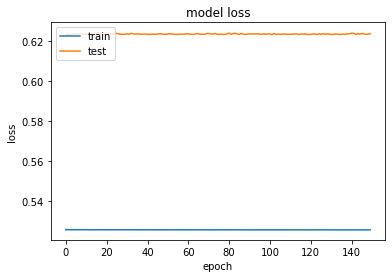

In [32]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()